This notebook doesn't really contain too much information (especially when considering its length), but I don't think it would be fair to delete it. 

I have tried to explore the trends and changes in prices as well as to further estabilish the connections between cards (as in the correlation matrix)

I have also tried some very basic approaches to identify and count the number of spikes in prices.

This notebook does not contain any kind of conclusions, but the findings in it contributed to the later parts. 

I can also point out that from here on I started to gather tournament deck data from aetherhub.com, for a better insight on card prices.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from glob2 import glob

In [2]:
set_names=pd.read_csv("editions.dat",sep=";", names=["URL", "set_name"])
#Load the file which contains the set names

In [3]:
def read(frame, name):# this is a modified version of the prel_plotting, I no longer need to plot
    pseu_df=pd.read_csv(name+"_unified.csv")
    pseu_df.date=pseu_df.date.str[:-5].astype('datetime64[ns]')
    #Now remove the ones that on average are under 0.2$ - the previous condition was too 'soft'
    pseu_df=pseu_df[pseu_df.name.isin(pseu_df.groupby("name")["fair_price"].mean().sort_values(ascending=False)[pseu_df.groupby("name")["fair_price"].mean().sort_values(ascending=False).values>0.2].index
    )]
    frame=pd.concat([frame, pseu_df])
    return frame, len(pseu_df.name.unique())
all_cards=pd.DataFrame()
for idx, row in set_names.iterrows():
    all_cards, set_names.loc[idx,"card_count"]=read(all_cards, row["set_name"])
all_cards=all_cards[~all_cards.date.isin( all_cards.groupby("date")["fair_price"].max()[all_cards.groupby("date")["fair_price"].max()==0].index ) ]
all_cards=all_cards.drop_duplicates(subset=["date", "name", "setName"])# 
# this whole block is from the prelim_1 notebook

In [4]:
all_cards

,bestVendorBuylist,bestVendorBuylistPrice,countForTrade,date,fair_price,lowestPrice,lowestPriceVendor,name,quantity,setName
0,Card Kingdom,0.10,0,2019-11-04,0.39,0.33,StrikeZone,Acclaimed Contender,0,Throne_of_Eldraine
1,Card Kingdom,8.00,0,2019-11-04,7.92,7.92,TCG Player,"Alela, Artful Provocateur",0,Throne_of_Eldraine
2,Card Kingdom,0.05,0,2019-11-04,0.18,0.18,TCG Player,All That Glitters,0,Throne_of_Eldraine
3,Card Kingdom,6.40,0,2019-11-04,7.99,7.99,TCG Player,Arcane Signet,0,Throne_of_Eldraine
5,UNDEFINED,0.00,0,2019-11-04,0.16,0.12,Miniature Market,Ardenvale Tactician,0,Throne_of_Eldraine
6,Card Kingdom,1.00,0,2019-11-04,1.48,0.99,StrikeZone,"Ayara, First of Locthwain",0,Throne_of_Eldraine
8,ABUGames,0.18,0,2019-11-04,1.03,0.49,StrikeZone,Banish into Fable,0,Throne_of_Eldraine
14,CoolStuff,1.75,0,2019-11-04,0.59,0.33,StrikeZone,Blacklance Paragon,0,Throne_of_Eldraine
17,Card Kingdom,1.70,0,2019-11-04,2.42,2.00,Miniature Market,Bonecrusher Giant,0,Throne_of_Eldraine
18,ABUGames,0.01,0,2019-11-04,0.09,0.09,TCG Player,Bramblefort Fink,0,Throne_of_Eldraine


Now at first I intend to look at the prices of the top few cards - At first overall, but this might change to per set. 

The idea would be to first look at the correlations between these very few cards, and then to see if the jumps in price have any regularities.

From there, I don't really have a plan what to do after, but the data should at least indicate directions to go.

The matching with events such as reveals, bans and tournament results should be in the '3rd phase', when the behaviour of prices is more or less clear.  

After that, possible trading strategies will be examined.

To choose the amount of cards used in this part, I'll plot the average cost of the cards vs. the variance of this cost and see if there is some place where it makes sense to cut off. I'm thinking of some kind of "elbow" on the plot.

At first I'll be looking at non-foil cards.


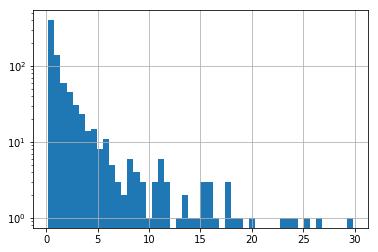

In [5]:

fig, ax = plt.subplots()
all_cards.groupby("name")["fair_price"].mean().sort_values(ascending=False).hist(bins=50, ax=ax)
ax.set_yscale('log')


In [6]:
non_foils=all_cards[(all_cards.setName.str[-4:]!="Foil")]


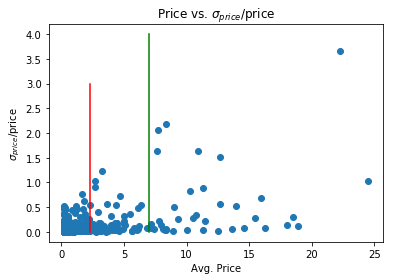

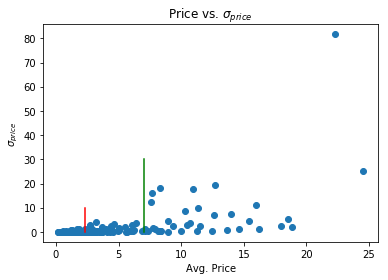

In [7]:
plt.plot(non_foils.groupby("name")["fair_price"].mean(), non_foils.groupby("name")["fair_price"].var()/non_foils.groupby("name")["fair_price"].mean(), "o")
plt.title("Price vs. $\\sigma_{price}$/price")
plt.xlabel("Avg. Price")
plt.ylabel("$\\sigma_{price}$/price")
plt.plot([2.3,2.3],[0,3],"r-")
plt.plot([7.0,7.0],[0,4],"g-")
plt.figure()
plt.plot(non_foils.groupby("name")["fair_price"].mean(), non_foils.groupby("name")["fair_price"].var(), "o")
plt.title("Price vs. $\\sigma_{price}$")
plt.xlabel("Avg. Price")
plt.ylabel("$\\sigma_{price}$")
plt.plot([2.3,2.3],[0,10],"r-")
plt.plot([7.0,7.0],[0,30],"g-")

Two places present themselves as obvious cutoff points. The first is around 2.3 \\$ (red line), which is the value of the first cards that seem to have an uptick in the variance of the price (since lower value cards tend to stay low regardless of meta except if something groundbreaking happens).

The second opportunity is around 7 \\$ (green), where a second, more significant uptick is seen. This is coincidentally the area where the density along the price axis becomes much lower, which is why I chose to go with this selection first.

The solo card with very high variance stands out is of course Oko, the card that got banned and shows a steady decline in price. 

c:\users\domenyb\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price of Oko (non-foil)')

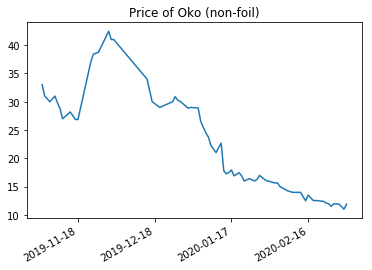

In [8]:
non_foils.groupby("name")["fair_price"].var().sort_values(ascending=False)
plt.plot(non_foils[non_foils.name=="Oko, Thief of Crowns"]["date"], non_foils[non_foils.name=="Oko, Thief of Crowns"]["fair_price"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.title ("Price of Oko (non-foil)")

In [9]:
HVN=non_foils[non_foils.name.isin(non_foils.groupby("name")["fair_price"].mean()[non_foils.groupby("name")["fair_price"].mean()>7].index)]# these are the 38 cards that are over the green line. HVN ~ High Value Nonfoils
HVN

,bestVendorBuylist,bestVendorBuylistPrice,countForTrade,date,fair_price,lowestPrice,lowestPriceVendor,name,quantity,setName
19,Card Kingdom,10.00,0,2019-11-04,14.56,14.99,Card Kingdom,Brazen Borrower,0,Throne_of_Eldraine
46,Card Kingdom,7.00,0,2019-11-04,8.14,8.14,TCG Player,Embercleave,0,Throne_of_Eldraine
55,CoolStuff,16.00,0,2019-11-04,17.24,17.24,TCG Player,Fabled Passage,0,Throne_of_Eldraine
104,StrikeZone,8.00,0,2019-11-04,13.67,13.35,ABUGames,"Kenrith, the Returned King",0,Throne_of_Eldraine
106,Card Kingdom,7.00,0,2019-11-04,9.30,9.30,TCG Player,"Korvold, Fae-Cursed King",0,Throne_of_Eldraine
132,TCG Player,33.82,0,2019-11-04,32.99,32.99,TCG Player,"Oko, Thief of Crowns",0,Throne_of_Eldraine
134,CoolStuff,16.00,0,2019-11-04,16.48,16.48,TCG Player,Once Upon a Time,0,Throne_of_Eldraine
146,CoolStuff,22.00,0,2019-11-04,22.99,22.99,TCG Player,Questing Beast,0,Throne_of_Eldraine
148,CoolStuff,10.00,0,2019-11-04,7.98,7.98,TCG Player,"Rankle, Master of Pranks",0,Throne_of_Eldraine
198,Card Kingdom,9.00,0,2019-11-04,11.79,11.79,TCG Player,The Great Henge,0,Throne_of_Eldraine


Once again reuse blocks from prelim1

In [10]:
def gather_nond(card_name, source, corr_mtx, foil=False):
    if card_name in ["Forest", "Island", "Swamp", "Mountain", "Plains"]:
        return corr_mtx
    pseu_mtx=source[(source.name==card_name)  ]# one card at a time
    pseu_mtx= pseu_mtx[pseu_mtx.setName.str[-4:]!="Foil"]#dont need the foils
    pseu_mtx=pseu_mtx.reset_index(drop=True)
    pseu_mtx=pseu_mtx.set_index("date", drop=False)
    if len(pseu_mtx.name)==0:
        return corr_mtx
    rolled=pseu_mtx.shift()# this is the "one day earlier" dataframe
    
    #corr_mtx=pd.DataFrame()

    corr_mtx[card_name]=pseu_mtx["fair_price"]
    return corr_mtx
prices_=pd.DataFrame()
for cardname in HVN.name.unique():
    prices_=gather_nond(cardname, HVN, prices_)
prev_row=(prices_.loc[[prices_.index[0]]]).iloc[0]
for idx, row in prices_.iterrows():
    row.fillna(prev_row)
    prev_row=row.copy()
    

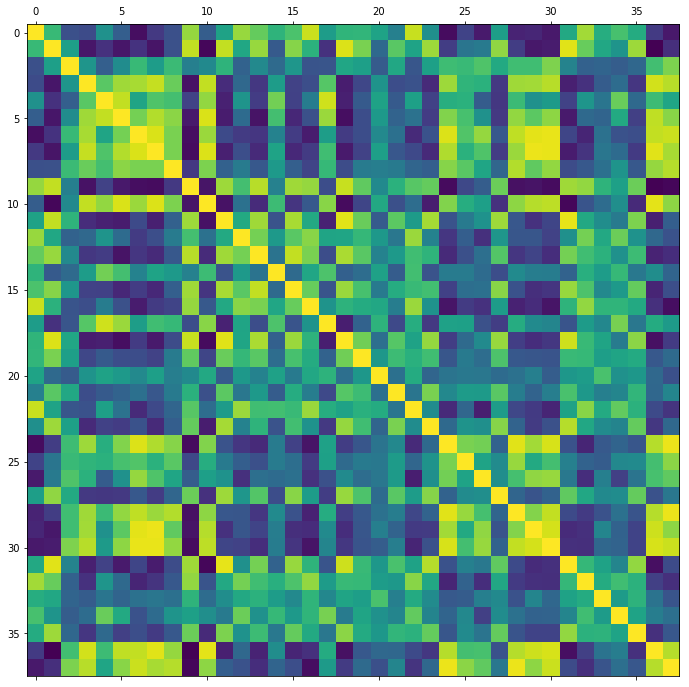

In [11]:
fig, ax = plt.subplots(figsize=(16,12))
ax.matshow(prices_.corr()) #The replace is because the mathshow uses the limits to determine the colors, and a 1.0 correlation would skew the colormap.


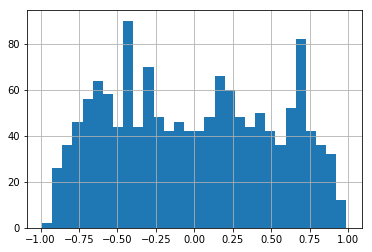

In [12]:
prices_.corr().stack().hist(range=[-0.99,0.99], bins=30)# 1.0 only happens with the card itself...

In [13]:
(prices_.corr().stack().sort_values()[:-38])[(prices_.corr().stack().sort_values()[:-38]).abs()>0.8]

Embercleave                   Vraska, Golgari Queen          -0.933228
Vraska, Golgari Queen         Embercleave                    -0.933228
The Great Henge               Vraska, Golgari Queen          -0.923193
Vraska, Golgari Queen         The Great Henge                -0.923193
Watery Grave                  The Great Henge                -0.902865
The Great Henge               Watery Grave                   -0.902865
Divine Visitation             The Royal Scions               -0.898517
The Royal Scions              Divine Visitation              -0.898517
Embercleave                   The Royal Scions               -0.896440
The Royal Scions              Embercleave                    -0.896440
                              Finale of Devastation          -0.879069
Finale of Devastation         The Royal Scions               -0.879069
The Great Henge               Godless Shrine                 -0.873856
Godless Shrine                The Great Henge                -0.873856
The Gr

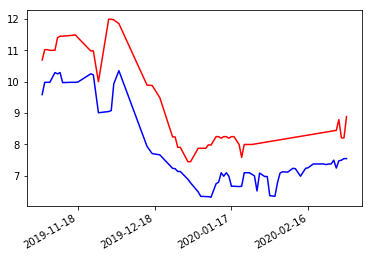

In [14]:
plt.plot(HVN[HVN.name=="Godless Shrine"]["date"], HVN[HVN.name=="Godless Shrine"]["fair_price"], "b-")
plt.plot(HVN[HVN.name=="Watery Grave"]["date"], HVN[HVN.name=="Watery Grave"]["fair_price"], "r-")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

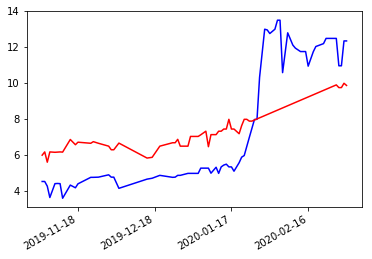

In [15]:
plt.plot(HVN[HVN.name=="Ajani, Strength of the Pride"]["date"], HVN[HVN.name=="Ajani, Strength of the Pride"]["fair_price"], "b-")
plt.plot(HVN[HVN.name=="Divine Visitation"]["date"], HVN[HVN.name=="Divine Visitation"]["fair_price"], "r-")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

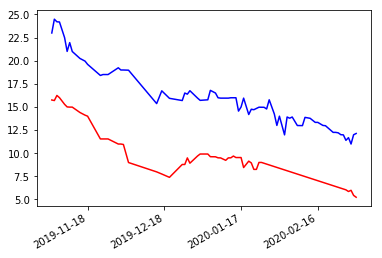

In [16]:
plt.plot(HVN[HVN.name=="Questing Beast"]["date"], HVN[HVN.name=="Questing Beast"]["fair_price"], "b-")
plt.plot(HVN[HVN.name=="Arclight Phoenix"]["date"], HVN[HVN.name=="Arclight Phoenix"]["fair_price"], "r-")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

Let's see a few anticorrelating ones

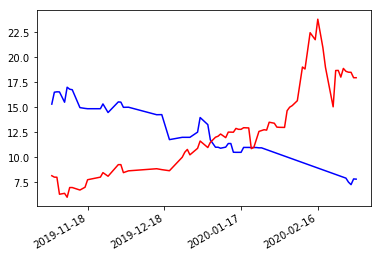

In [17]:
plt.plot(HVN[HVN.name=="Vraska, Golgari Queen"]["date"], HVN[HVN.name=="Vraska, Golgari Queen"]["fair_price"], "b-")
plt.plot(HVN[HVN.name=="Embercleave"]["date"], HVN[HVN.name=="Embercleave"]["fair_price"], "r-")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

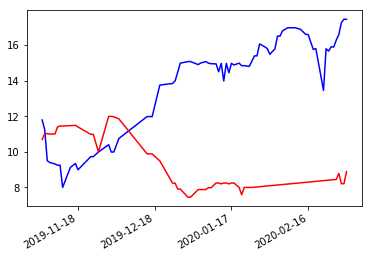

In [18]:
plt.plot(HVN[HVN.name=="The Great Henge"]["date"], HVN[HVN.name=="The Great Henge"]["fair_price"], "b-")
plt.plot(HVN[HVN.name=="Watery Grave"]["date"], HVN[HVN.name=="Watery Grave"]["fair_price"], "r-")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

The general picture seems to be that in the correlating case either just the trends or in some cases even the jumps seem to match, while in the anticorrelating it is safe to say that mostly just the general trends (the card getting more or less expensive) seem to be connected. There might be some success in an attempt matching the jumps in the case of the first anticorrelation, but I would argue that it would be coincidence.

In [19]:
#Trying the hierarchical clustering from the first notebook - only now on this much smaller sample.
import scipy.cluster.hierarchy as sch # import scipy


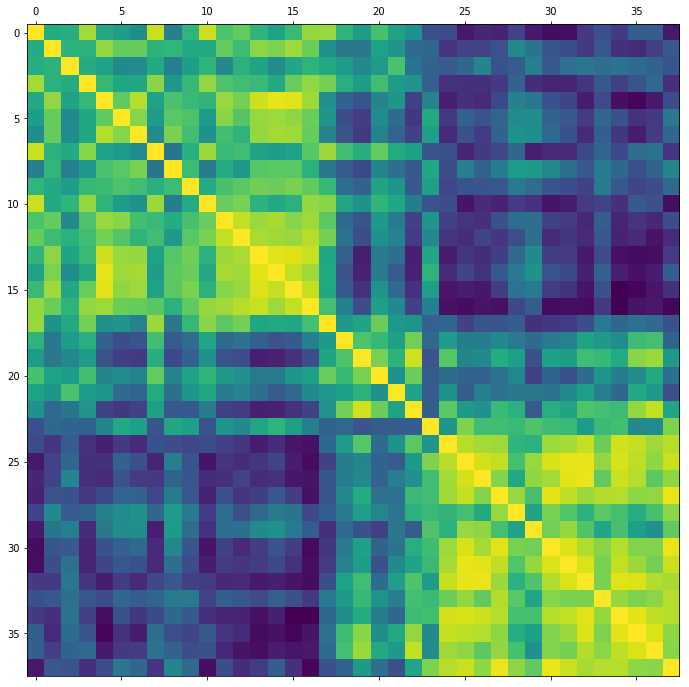

In [20]:
distances=sch.distance.pdist(prices_.corr().values)# calculate all the distances

sch.fcluster(sch.linkage(distances, method='complete'), distances.max()/2, 'distance')#this cell does nothing, I was just curious of the output
recl=sch.fcluster(sch.linkage(distances, method='complete'), distances.max()/2, 'distance')# the above cell, this time the output is saved

columns = [prices_.corr().columns.tolist()[i] for i in list((np.argsort(recl)))]#renaming, all that jazz for plotting
recl_corr = prices_.reindex(columns, axis=1)
fig, ax = plt.subplots(figsize=(16,12))
ax.matshow(recl_corr.corr()) #The replace is no longer needed


This two (arguably three with the middle? ) cluster resolution is something I don't like, at first it seems the trivial solution is that there are two "bundles" of cards: the ones with increasing and the ones with decreasing value. I'll investigate further to see whether this is the case or if I can find something better.

It is also possible that these clusters are more or less alligned with the colors and not the actual decks the cards are featured in.

In [21]:
(recl_corr.corr()[11:17].index) # a small "brighter" cube

Index(['Leyline of the Void', 'Cavalier of Thorns', 'Finale of Devastation',
       'Ajani, Strength of the Pride', 'Embercleave', 'The Great Henge'],
      dtype='object')

In [22]:
(recl_corr.corr()[17:23].index)# the middle cube

Index(['Cavalier of Night', 'Chandra, Awakened Inferno',
       'Vivien, Arkbow Ranger', 'Steam Vents', 'Nicol Bolas, Dragon-God',
       'Korvold, Fae-Cursed King'],
      dtype='object')

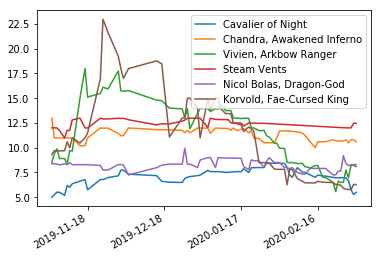

In [23]:
for card in (recl_corr.corr()[17:23].index):# the middle cube
    plt.plot(HVN[HVN.name==card]["date"], HVN[HVN.name==card]["fair_price"], "-", label=card)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

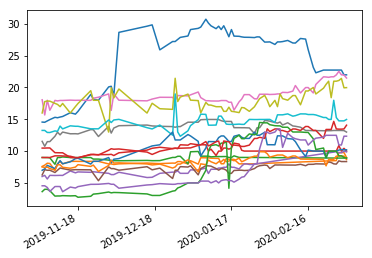

In [24]:
for card in (recl_corr.corr()[0:15].index):# the middle cube
    plt.plot(HVN[HVN.name==card]["date"], HVN[HVN.name==card]["fair_price"], "-", label=card)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

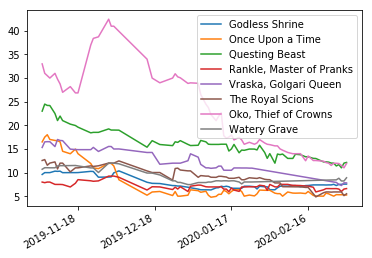

In [25]:
for card in (recl_corr.corr()[30:].index):# the middle cube
    plt.plot(HVN[HVN.name==card]["date"], HVN[HVN.name==card]["fair_price"], "-", label=card)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

Now... Oko have shown a huge decline in price (along with Once upon a time) after being banned so that probably shouldn't be a surprise. 

Their ban also removed an archetype from the meta which caused questing beast and Vraska to slowly decrease in value. 

The other cards seem to only coincide with the general trend of losing value - most of them being overrated cards that fell out of favor in the meta, or lands. 

Here I think I would need to take another approach, I think Oko and once upon a time will be dropped, and I will investigate the jumps in prices (just the time at which they happen. This is to see whether they happen on weekends/well defined - predictable - dates, or all over the place) after looking at the most prominent pairs.

In [26]:
(prices_.corr().stack().sort_values()[:-38])[(prices_.corr().stack().sort_values()[:-38]).abs()>0.8].index.get_level_values(0).value_counts()# How many times does one card appear here. Also, it can be seen how many cards are present.

The Great Henge                 12
Vraska, Golgari Queen           11
Assassin's Trophy               11
The Royal Scions                10
Embercleave                     10
Once Upon a Time                 9
Questing Beast                   8
Finale of Devastation            7
Watery Grave                     7
Godless Shrine                   7
Arclight Phoenix                 6
Oko, Thief of Crowns             6
Brazen Borrower                  6
Kenrith, the Returned King       5
Stomping Ground                  5
Divine Visitation                5
Ajani, Strength of the Pride     4
Sorin, Imperious Bloodlord       4
Cavalier of Thorns               2
Korvold, Fae-Cursed King         2
Blood Crypt                      1
Leyline of the Void              1
Vivien, Arkbow Ranger            1
dtype: int64

In [27]:
top_corr=recl_corr[(prices_.corr().stack().sort_values()[:-38])[(prices_.corr().stack().sort_values()[:-38]).abs()>0.8].index.get_level_values(0).unique()]

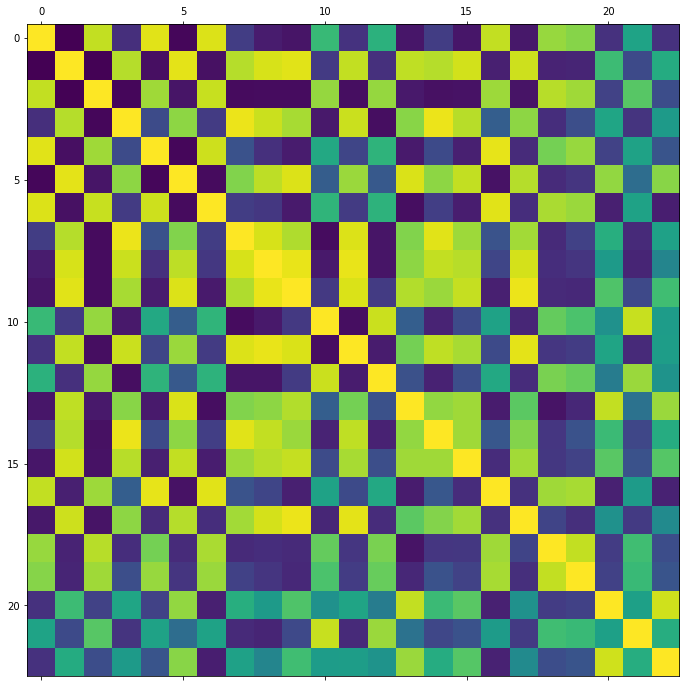

In [28]:
fig, ax = plt.subplots(figsize=(16,12))
ax.matshow(top_corr.corr()) #The replace is no longer needed




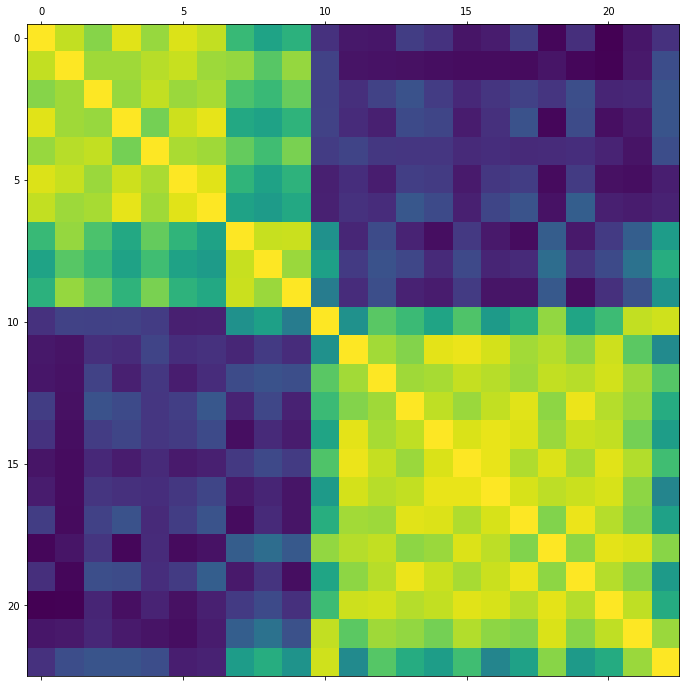

In [29]:
distances_t=sch.distance.pdist(top_corr.corr().values)# calculate all the distances

sch.fcluster(sch.linkage(distances_t, method='complete'), distances.max()/2, 'distance')#this cell does nothing, I was just curious of the output
recl_t=sch.fcluster(sch.linkage(distances_t, method='complete'), distances.max()/2, 'distance')# the above cell, this time the output is saved

columns_t = [top_corr.corr().columns.tolist()[i] for i in list((np.argsort(recl_t)))]#renaming, all that jazz for plotting
recl_corr_t = top_corr.reindex(columns_t, axis=1)
fig, ax = plt.subplots(figsize=(16,12))
ax.matshow(recl_corr_t.corr()) #The replace is no longer needed


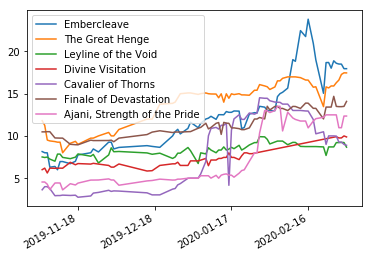

In [30]:
for card in (recl_corr_t.corr()[0:7].index):# the top cube
    plt.plot(HVN[HVN.name==card]["date"], HVN[HVN.name==card]["fair_price"], "-", label=card)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

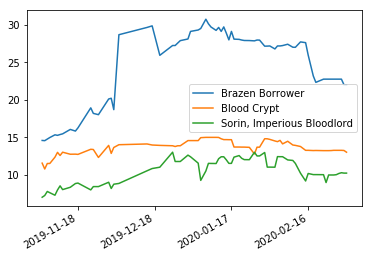

In [31]:
for card in (recl_corr_t.corr()[7:10].index):# the middle cube
    plt.plot(HVN[HVN.name==card]["date"], HVN[HVN.name==card]["fair_price"], "-", label=card)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

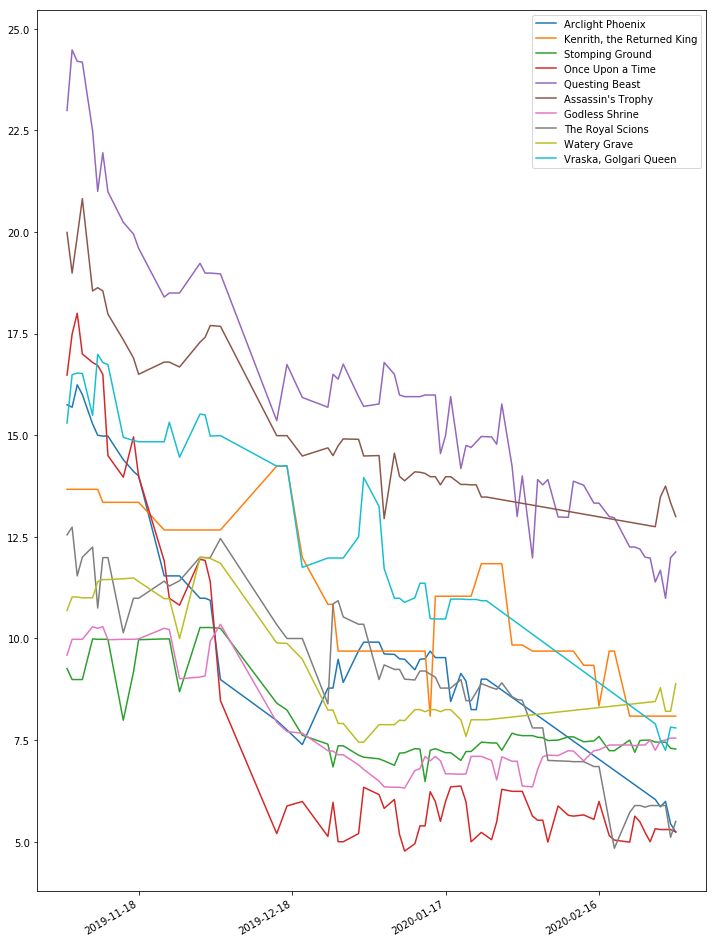

In [78]:
plt.figure(figsize=(12,18))
for card in (recl_corr_t.corr()[11:21].index):# the bottom cube w/o the "borders"
    plt.plot(HVN[HVN.name==card]["date"], HVN[HVN.name==card]["fair_price"], "-", label=card)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

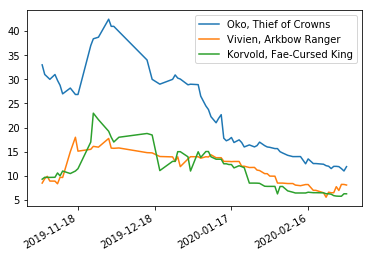

In [33]:
for card in (recl_corr_t.corr()[21:].index.append(recl_corr_t.corr()[10:11].index)):# the remainder
    plt.plot(HVN[HVN.name==card]["date"], HVN[HVN.name==card]["fair_price"], "-", label=card)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

I might have spent too much time on this part, bot now is the part when I can say beyond reasonable doubt that this method seems to couple more or less the general trends aside from a few notable exceptions. 

Maybe the spikes give a better idea, but at first we would have to define what exactly is called a spike for obvious reasons.

There are multiple ways of identifying such spikes, but I intend to not "over-define" them so they would fit whatever I have in mind.

The way - and reasoning - I tried at first is as follows: 
    - I determine the expected price extrapolating from a linear fit based on the last few (let's say 5, but could be a bit more should I feel that the linear trends can be kept longer) points.
    - Since a linear fit only needs 2 points to fit (for a trivial solution), the 5 allows me to estimate a deviation.
    - for the next few (let it again be 5, but 2-3 could be fine as well... This is something I wouldn't let over 5) points I calculate which one deviates the most from this, and if it is not the farthest (which would indicate kind of increasing deviation, ie. the regression is not linear OR the spike is right there, in which case it will be found in a later iteration anyway)
    - If the farthest has the largest deviation, probably no spike "in the mix". However, if the highest deviation is not the last one, there is a spike. But I'll only accept a spike if this deviation is at least twice the standard error  - so I can be confident that this is a spike and not noise.

Alternatively, I could just go ahead and determine these spikes as local maxima/minima, which of course is a very straightforward way to finding them, but this has a chance of removing some cases when the price changes monotonously, but still shows a jump in it somewhere. This could also fail if the card jumps in price, and then keeps the curve relatively flat. This would mean that the local extremum is most likely to be somewhere "in the plateu" created by a small fluctuation in price.

I shall see what this actually results in a few carefully selected cases, so I can see if this makes sense.

Cases to check the algorithm on: 

Cavalier of Thorns  - because of the steep increase seen in that case.

Sorin, Imperious Bloodlord - It seems to have a rather regular curve - not too smooth, a few spikes, but no prominent features.

Stomping ground  - land

Divine visitation - a steady but very smooth increase.
    

In [34]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score, mean_squared_error,  mean_absolute_error,  max_error,  r2_score 

So while building the function to recognise the spikes I have found a more promising way based on the above graph: 

Basically I use 3 (after trying, 5 seemed excessive) points to fit a linear (I don't think "training" would be an appropriate term here, but technically...) model, and then evaluate it for the next 5 (maybe I could do it for less) models. Then for every i=[2...N-5] I try to use various metrics to identify the peaks. This should be easy enough to do. I will use more than sufficient metrics to demonstrate the differences between them.

If this method works on the above mentioned few cards, I shall use it for the whole sample to see the density of the spikes - whether they are predictable (maybe periodic?). 
I think it would also be interesting to see if there is any correlation between the general trend of a card's price and the spikes (positive or negative), since this could be exploited later.



In [35]:
example_=HVN[HVN.name=="Cavalier of Thorns"]
example_=example_.reset_index(drop=True)
example_

,bestVendorBuylist,bestVendorBuylistPrice,countForTrade,date,fair_price,lowestPrice,lowestPriceVendor,name,quantity,setName
0,TCG Player,3.95,0,2019-11-04,3.62,3.62,TCG Player,Cavalier of Thorns,0,Core_Set_2020
1,TCG Player,3.95,0,2019-11-05,3.99,3.99,TCG Player,Cavalier of Thorns,0,Core_Set_2020
2,TCG Player,3.95,0,2019-11-06,3.99,3.99,TCG Player,Cavalier of Thorns,0,Core_Set_2020
3,CoolStuff,3.00,0,2019-11-07,3.76,3.76,TCG Player,Cavalier of Thorns,0,Core_Set_2020
4,CoolStuff,3.00,0,2019-11-09,2.92,2.92,TCG Player,Cavalier of Thorns,0,Core_Set_2020
5,CoolStuff,3.00,0,2019-11-10,2.94,2.94,TCG Player,Cavalier of Thorns,0,Core_Set_2020
6,CoolStuff,3.00,0,2019-11-11,2.94,2.94,TCG Player,Cavalier of Thorns,0,Core_Set_2020
7,TCG Player,1.50,0,2019-11-12,2.99,2.99,TCG Player,Cavalier of Thorns,0,Core_Set_2020
8,TCG Player,2.13,0,2019-11-15,2.95,2.95,TCG Player,Cavalier of Thorns,0,Core_Set_2020
9,TCG Player,2.12,0,2019-11-17,2.98,2.98,TCG Player,Cavalier of Thorns,0,Core_Set_2020


In [36]:

regr = linear_model.LinearRegression()

regr.fit((example_.date[:5]-example_.date[0]).astype('timedelta64[D]').values.reshape(5,1), example_.fair_price[:5])
example_.date[:5].values.reshape(5,1)



array([['2019-11-04T00:00:00.000000000'],
       ['2019-11-05T00:00:00.000000000'],
       ['2019-11-06T00:00:00.000000000'],
       ['2019-11-07T00:00:00.000000000'],
       ['2019-11-09T00:00:00.000000000']], dtype='datetime64[ns]')

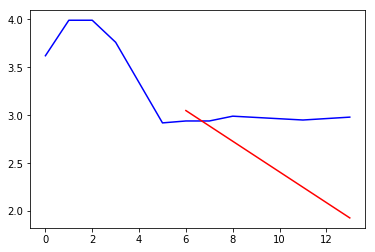

In [37]:
y_pred = regr.predict((example_.date[5:10]-example_.date[0]).astype('timedelta64[D]').values.reshape(5,1))
plt.plot((example_.date[:10]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[:10], "b-")
plt.plot((example_.date[5:10]-example_.date[0]).astype('timedelta64[D]'), y_pred, "r-")


2 variance: -2.4668990203466454
3 variance: -114.39925373134274
4 variance: -2110.2189239331974
5 variance: -66.44042944191902
6 variance: -0.5213270142180106
7 variance: 0.2087938111777703
8 variance: -0.029029122121114304
9 variance: -0.07460940251598891
10 variance: -2.073743120843845
11 variance: -0.022047783000090915
12 variance: -1.7165492957746395
13 variance: -59.56819768480171
14 variance: -8.59578222142047
15 variance: -3.86110062299415
16 variance: -0.8983924867480919
17 variance: 0.19942064339076082
18 variance: -0.31000010549727364
19 variance: -0.3740247237357508
20 variance: -0.42880075518422456
21 variance: 0.6699965549333868
22 variance: 0.7801533889419479
23 variance: -0.34626454011272045
24 variance: 0.623398908285143
25 variance: 0.3528331014690459
26 variance: 0.2428495107687878
27 variance: 0.006327105091500584
28 variance: 0.1631971074043168
29 variance: -4.01027363502617
30 variance: -144.14497536466328
31 variance: -115.12612387612396
32 variance: -0.2144830487

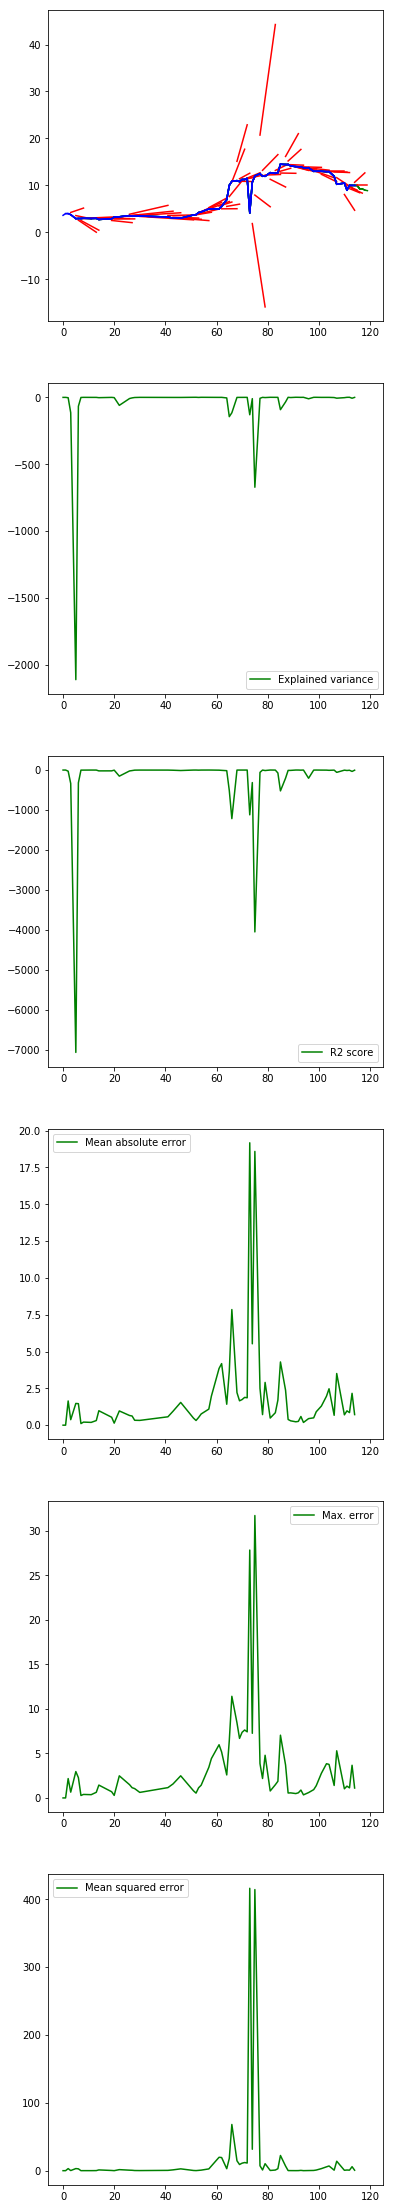

In [38]:
example_=HVN[HVN.name=="Cavalier of Thorns"]
example_=example_.reset_index(drop=True)
example_
interp_from=3
interp_for=5
regr = linear_model.LinearRegression()
plt.subplots(nrows=6, ncols=1, figsize=(6,40))
plt.subplot(6,1,1)
exp_var=[0,0]
msq=[0,0]
mae=[0,0]
max_e=[0,0]
r2=[0,0]
for i in range (len(example_.date)-interp_for-2):
    regr.fit((example_.date[i:i+interp_from]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_from,1), example_.fair_price[i:i+interp_from])
    y_pred = regr.predict((example_.date[i+interp_from:i+interp_from+interp_for]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_for,1))

    plt.plot((example_.date[i:i+interp_from+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[i:i+interp_from+1], "b-", label="Training points")
    plt.plot((example_.date[i+interp_from:i+interp_from+interp_for]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[i+interp_from:i+interp_from+interp_for], "g-", label="Test points")
    plt.plot((example_.date[i+interp_from:i+interp_from+interp_for]-example_.date[0]).astype('timedelta64[D]'), y_pred, "r-", label="predicted change")
    print(str(i+2)+ " variance: "+ str(explained_variance_score(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred)))
    exp_var.append(explained_variance_score(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))
    msq.append(mean_squared_error(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))
    mae.append(mean_absolute_error(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))
    max_e.append(max_error(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))
    r2.append(r2_score(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))
    x,y=plt.xlim()
plt.subplot(6,1,2)
#plt.title("The misfits")
plt.plot((example_.date[:len(exp_var)]-example_.date[0]).astype('timedelta64[D]'), exp_var, "g-", label="Explained variance")
plt.xlim(x,y)
plt.legend()
plt.subplot(6,1,6)
#plt.title("The misfits")
plt.plot((example_.date[:len(msq)]-example_.date[0]).astype('timedelta64[D]'), msq, "g-", label="Mean squared error")
plt.xlim(x,y)
plt.legend()
plt.subplot(6,1,4)
#plt.title("The misfits")
plt.plot((example_.date[:len(mae)]-example_.date[0]).astype('timedelta64[D]'), mae, "g-", label="Mean absolute error")
plt.xlim(x,y)
plt.legend()
plt.subplot(6,1,5)
#plt.title("The misfits")
plt.plot((example_.date[:len(max_e)]-example_.date[0]).astype('timedelta64[D]'), max_e, "g-", label="Max. error")
plt.xlim(x,y)
plt.legend()
plt.subplot(6,1,3)
#plt.title("The misfits")
plt.plot((example_.date[:len(r2)]-example_.date[0]).astype('timedelta64[D]'), r2, "g-", label="R2 score")
plt.xlim(x,y)
plt.legend()





In [39]:
from scipy.signal import find_peaks

Text(0.5, 1.0, 'From explained variance - vol 0')

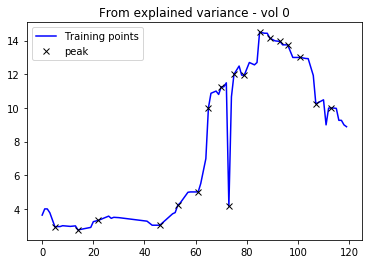

In [40]:
plt.figure()
peak_fromexp=find_peaks(np.negative(exp_var))
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "b-", label="Training points")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
plt.plot([],[], "kx", label="peak")
plt.xlim(x,y)
plt.legend()
plt.title("From explained variance - vol 0")


Text(0.5, 1.0, 'from r2 score - vol 0')

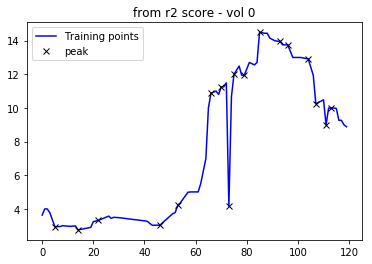

In [41]:
plt.figure()
peak_fromexp=find_peaks(np.negative(r2))
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "b-", label="Training points")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
plt.plot([],[], "kx", label="peak")
plt.xlim(x,y)
plt.legend()
plt.title("from r2 score - vol 0")

Text(0.5, 1.0, 'from max. error - vol 0')

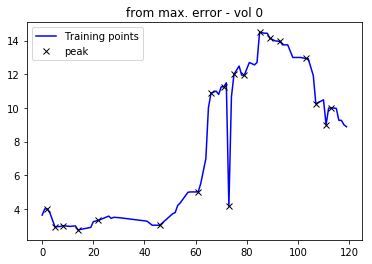

In [42]:
plt.figure()
peak_fromexp=find_peaks(max_e)
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "b-", label="Training points")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
plt.plot([],[], "kx", label="peak")
plt.xlim(x,y)
plt.legend()
plt.title("from max. error - vol 0")


Text(0.5, 1.0, 'from mean absolute error - vol 0')

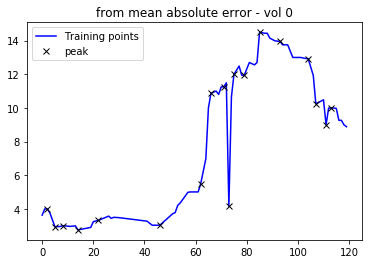

In [43]:
plt.figure()
peak_fromexp=find_peaks(mae)
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "b-", label="Training points")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
plt.plot([],[], "kx", label="peak")
plt.xlim(x,y)
plt.legend()
plt.title("from mean absolute error - vol 0")


Text(0.5, 1.0, 'from local limits - vol 0')

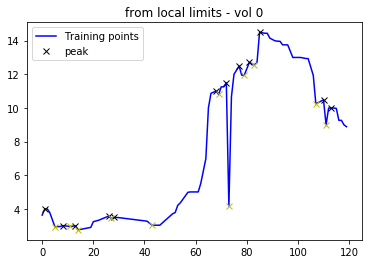

In [44]:
plt.figure()
peak_fromexp=find_peaks(example_.fair_price)
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "b-", label="Training points")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
peak_fromexp=find_peaks(np.negative(example_.fair_price))
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "yx", label="_nolegend_")
plt.plot([],[], "kx", label="peak")
plt.xlim(x,y)
plt.legend()
plt.title("from local limits - vol 0")


Vol 0 means that for the peak searching I did not apply any further constraints. So local maxima (and minima - in the case of the last plot) are all accepted as 'peaks'.

From here I would like to discuss what these slightly different metrics bring to the table.

Of course, the overall local min-max searching finds these peaks - mostly - but find a whole bunch of "false positives", the most of all the methods.

My favourite is the Mean absolute error (or the mean squared error, technically at this point they are equivalent, the difference comes when the height of the individual peaks is taken into account.) at this point, with the least amount of "noise", and also - in contrast with the r2 and EV, it does find the very first "hill" as a peak.

I do like the mean absolute error more than the squared one, since currently I wish to examine the density of the peaks, so it is in my interest to keep the lesser peaks recognisable as well. 

From here on, I intend to continue only with the mean absolute error and the actual local limit search - and refine these two until I find what I decide to be the best peak identification.

At first, let's see the first approximation with the MAE. 
I intend to use two parameters, the distance ( - as in, two peaks should be at least 3-4 points apart. Otherwise it is not a peak, but rather the one between them is the peak...). The second is the prominence. I would try to adjust this empirically.

Edit: A prominence of .5 includes very meaningless peaks. For this particular case I chose the prominence to be >1, and still no important peak would be lost.

{'prominences': array([ 1.53666667,  1.22698812,  2.75885714,  6.19590476, 18.99      ,
         2.1867619 ,  3.80904762,  2.80646154,  1.44466667]),
 'left_bases': array([ 1,  6,  1,  1,  1, 41, 43, 53, 62], dtype=int32),
 'right_bases': array([ 6, 22, 29, 33, 53, 43, 53, 62, 66], dtype=int32)}

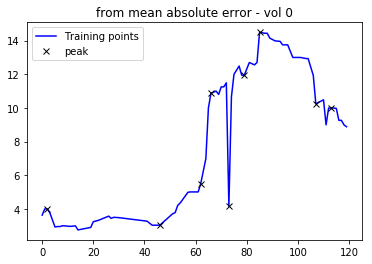

In [45]:
plt.figure()
peak_fromexp=find_peaks(mae, distance=3, prominence=1)
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "b-", label="Training points")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
plt.plot([],[], "kx", label="peak")
plt.xlim(x,y)
plt.legend()
plt.title("from mean absolute error - vol 0")
peak_fromexp[1]

In the case of the pure searching I have an easier case, the prominence can be clearly the jump in price. I wish this to be .5 at the start. THe distance is kept at 3.

I also introduce the width parameter - and keep it at 4, just so the peaks are indeed sharp peaks.

Text(0.5, 1.0, 'from local limits - vol 0')

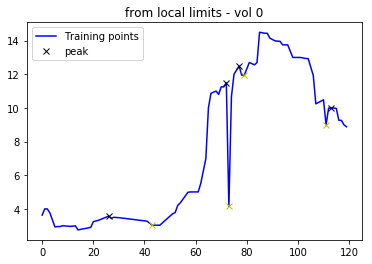

In [46]:
plt.figure()
peak_fromexp=find_peaks(example_.fair_price, distance=3 , prominence =.5, width=(0,10))
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "b-", label="Training points")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
peak_fromexp=find_peaks(np.negative(example_.fair_price), distance=3, prominence =.5, width=(0,6))
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "yx", label="_nolegend_")
plt.plot([],[], "kx", label="peak")
plt.xlim(x,y)
plt.legend()
plt.title("from local limits - vol 0")


So in this case I like the MAE more. It finds better peaks, the only peak I take issue with is the one downward spike around day #110. So this is the one I will most likely try to use to count the spikes.

Now I try to plot the other three further chosen cards together


{}

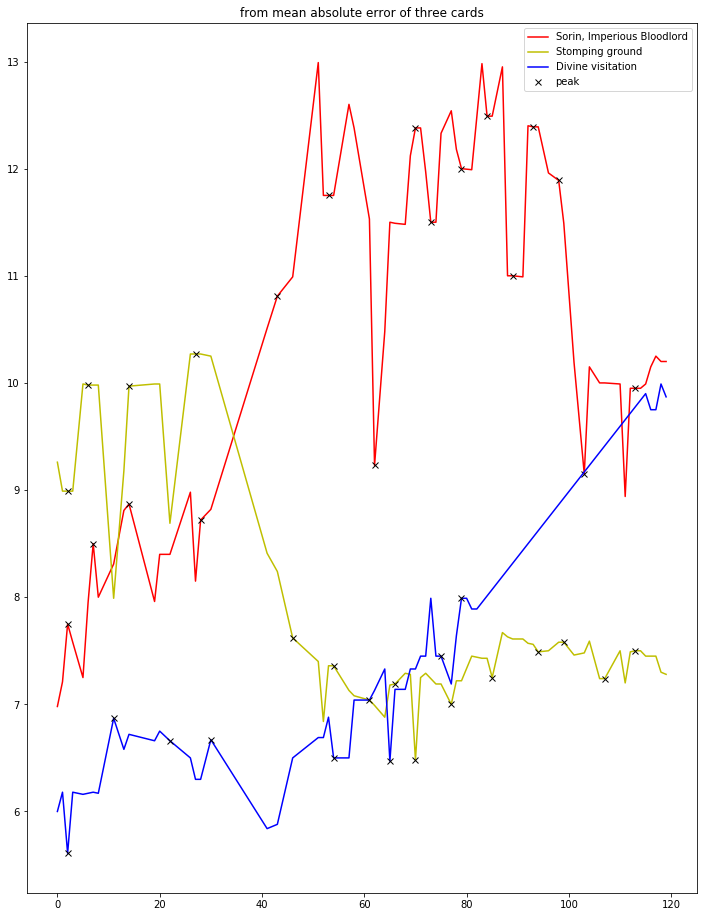

In [47]:
example_=HVN[HVN.name=="Sorin, Imperious Bloodlord"]
example_=example_.reset_index(drop=True)
example_
interp_from=3
interp_for=5
mae=[0,0]
regr = linear_model.LinearRegression()
for i in range (len(example_.date)-interp_for-2):
    regr.fit((example_.date[i:i+interp_from]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_from,1), example_.fair_price[i:i+interp_from])
    y_pred = regr.predict((example_.date[i+interp_from:i+interp_from+interp_for]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_for,1))
    mae.append(mean_absolute_error(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))

plt.figure(figsize=(12,16))
peak_fromexp=find_peaks(mae, distance=3)
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "r-", label="Sorin, Imperious Bloodlord")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")


plt.legend()

peak_fromexp[1]

example_=HVN[HVN.name=="Stomping Ground"]
example_=example_.reset_index(drop=True)
example_
interp_from=3
interp_for=5
mae=[0,0]
regr = linear_model.LinearRegression()
for i in range (len(example_.date)-interp_for-2):
    regr.fit((example_.date[i:i+interp_from]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_from,1), example_.fair_price[i:i+interp_from])
    y_pred = regr.predict((example_.date[i+interp_from:i+interp_from+interp_for]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_for,1))
    mae.append(mean_absolute_error(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))


peak_fromexp=find_peaks(mae, distance=3)
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "y-", label="Stomping ground")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")


peak_fromexp[1]


example_=HVN[HVN.name=="Divine Visitation"]
example_=example_.reset_index(drop=True)
example_
interp_from=3
interp_for=5
mae=[0,0]
regr = linear_model.LinearRegression()
for i in range (len(example_.date)-interp_for-2):
    regr.fit((example_.date[i:i+interp_from]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_from,1), example_.fair_price[i:i+interp_from])
    y_pred = regr.predict((example_.date[i+interp_from:i+interp_from+interp_for]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_for,1))
    mae.append(mean_absolute_error(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))


peak_fromexp=find_peaks(mae, distance=3)
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "b-", label="Divine visitation")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
plt.plot([],[], "kx", label="peak")

plt.legend()
plt.title("from mean absolute error of three cards")
peak_fromexp[1]

{'prominences': array([1.03, 0.86, 0.8 ]),
 'left_bases': array([ 8, 29, 37], dtype=int32),
 'right_bases': array([49, 49, 49], dtype=int32),
 'widths': array([2.38661096, 1.14179104, 3.14814815]),
 'width_heights': array([-6.355, -6.9  , -7.59 ]),
 'left_ips': array([17.37951807, 29.5       , 37.74074074]),
 'right_ips': array([19.76612903, 30.64179104, 40.88888889])}

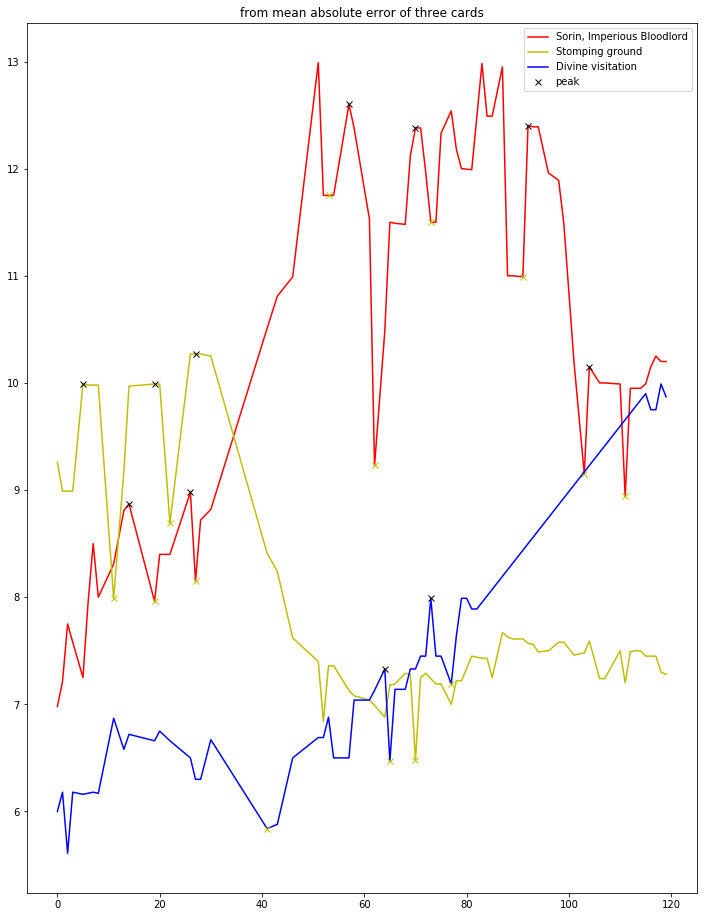

In [50]:
example_=HVN[HVN.name=="Sorin, Imperious Bloodlord"]
example_=example_.reset_index(drop=True)
example_
interp_from=3
interp_for=5
mae=[0,0]
regr = linear_model.LinearRegression()
for i in range (len(example_.date)-interp_for-2):
    regr.fit((example_.date[i:i+interp_from]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_from,1), example_.fair_price[i:i+interp_from])
    y_pred = regr.predict((example_.date[i+interp_from:i+interp_from+interp_for]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_for,1))
    mae.append(mean_absolute_error(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))

plt.figure(figsize=(12,16))
peak_fromexp=find_peaks(example_.fair_price, distance=4, prominence=.7, width=(0,6))
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "r-", label="Sorin, Imperious Bloodlord")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
peak_fromexp=find_peaks(np.negative(example_.fair_price), distance=4, prominence=.7, width=(0,6))
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "yx", label="_nolegend_")



plt.legend()

peak_fromexp[1]

example_=HVN[HVN.name=="Stomping Ground"]
example_=example_.reset_index(drop=True)
example_
interp_from=3
interp_for=5
mae=[0,0]
regr = linear_model.LinearRegression()
for i in range (len(example_.date)-interp_for-2):
    regr.fit((example_.date[i:i+interp_from]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_from,1), example_.fair_price[i:i+interp_from])
    y_pred = regr.predict((example_.date[i+interp_from:i+interp_from+interp_for]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_for,1))
    mae.append(mean_absolute_error(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))


peak_fromexp=find_peaks(example_.fair_price, distance=4, prominence=.7, width=(0,6))
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "y-", label="Stomping ground")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
peak_fromexp=find_peaks(np.negative(example_.fair_price), distance=4, prominence=.7, width=(0,6))
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "yx", label="_nolegend_")



peak_fromexp[1]


example_=HVN[HVN.name=="Divine Visitation"]
example_=example_.reset_index(drop=True)
example_
interp_from=3
interp_for=5
mae=[0,0]
regr = linear_model.LinearRegression()
for i in range (len(example_.date)-interp_for-2):
    regr.fit((example_.date[i:i+interp_from]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_from,1), example_.fair_price[i:i+interp_from])
    y_pred = regr.predict((example_.date[i+interp_from:i+interp_from+interp_for]-example_.date[i]).astype('timedelta64[D]').values.reshape(interp_for,1))
    mae.append(mean_absolute_error(example_.fair_price[i+interp_from:i+interp_from+interp_for], y_pred))


peak_fromexp=find_peaks(example_.fair_price, distance=4, prominence=.7, width=(0,6))
plt.plot((example_.date-example_.date[0]).astype('timedelta64[D]'), example_.fair_price, "b-", label="Divine visitation")
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "kx", label="_nolegend_")
plt.plot([],[], "kx", label="peak")
peak_fromexp=find_peaks(np.negative(example_.fair_price), distance=4, prominence=.7, width=(0,6))
for peak in peak_fromexp[0]:
    plt.plot((example_.date[peak:peak+1]-example_.date[0]).astype('timedelta64[D]'), example_.fair_price[peak], "yx", label="_nolegend_")




plt.legend()
plt.title("from mean absolute error of three cards")
peak_fromexp[1]

...After all this, on a general note I would say that the simple local limit searching - while obviously having its problems - is the best way without investing way more time into this - initially small - part of the analysis.

In [51]:
import calendar # to convert dates to week of day

In [52]:

def gather_spikes(data_, ticks_p_card):
    pseu=pd.DataFrame()
    pseu["date"]=data_.date.unique()
    pseu=pseu.set_index("date", drop=True)
    pseu["count+"]=0
    pseu["count-"]=0
    for card_name in data_.name.unique():
        example_=HVN[HVN.name==card_name]
        example_=example_.reset_index(drop=True)
        peak_fromexp=find_peaks(example_.fair_price, distance=4, prominence=.7, width=(0,6))
        pseu.loc[example_.date[peak_fromexp[0]], "count+"]+=1
        i=len(peak_fromexp[0])
        peak_fromexp=find_peaks(np.negative(example_.fair_price), distance=4, prominence=.7, width=(0,6))
        pseu.loc[example_.date[peak_fromexp[0]], "count-"]+=1
        print(card_name + ": +" +str(i)+ "  -"+str(len(peak_fromexp[0])))
        ticks_p_card.loc[card_name, "poz"]=i
        ticks_p_card.loc[card_name, "neg"]=len(peak_fromexp[0])
    return pseu

In [53]:
TpK=pd.DataFrame()
spike_coll=gather_spikes(HVN, TpK)

Brazen Borrower: +4  -3
Embercleave: +3  -2
Fabled Passage: +4  -7
Kenrith, the Returned King: +2  -1
Korvold, Fae-Cursed King: +3  -4
Oko, Thief of Crowns: +5  -7
Once Upon a Time: +8  -8
Questing Beast: +9  -8
Rankle, Master of Pranks: +0  -6
The Great Henge: +0  -2
The Royal Scions: +3  -4
Ajani, Strength of the Pride: +2  -6
Cavalier of Night: +3  -2
Cavalier of Thorns: +0  -2
Chandra, Awakened Inferno: +0  -2
Leyline of the Void: +3  -4
Sorin, Imperious Bloodlord: +6  -8
Vivien, Arkbow Ranger: +2  -5
Finale of Devastation: +2  -3
Liliana, Dreadhorde General: +5  -3
Nicol Bolas, Dragon-God: +4  -5
Teferi, Time Raveler: +9  -9
Blood Crypt: +1  -2
Breeding Pool: +3  -4
Godless Shrine: +3  -2
Hallowed Fountain: +1  -4
Hydroid Krasis: +4  -3
Smothering Tithe: +1  -3
Stomping Ground: +3  -3
Arclight Phoenix: +1  -2
Assassin's Trophy: +3  -3
Divine Visitation: +2  -3
Overgrown Tomb: +3  -3
Sacred Foundry: +2  -2
Steam Vents: +1  -3
Temple Garden: +3  -2
Vraska, Golgari Queen: +3  -3
Wate

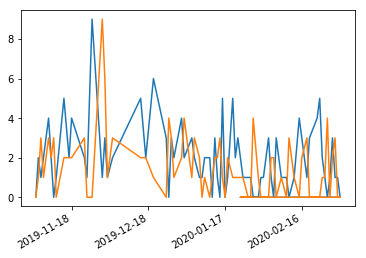

In [54]:
plt.plot(spike_coll["count-"])
plt.plot(spike_coll["count+"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()

No immediately visible periodicites here.

In [55]:
for idx, row in spike_coll.iterrows():
    spike_coll.loc[idx, "weekday"]=calendar.day_name[idx.weekday()]



In [56]:
#upsikes
spike_coll.sort_values("weekday")
for ind_weekday in spike_coll.weekday.unique():
    all_spikes=spike_coll[spike_coll["weekday"]==ind_weekday]["count+"].sum()+spike_coll[spike_coll["weekday"]==ind_weekday]["count-"].sum()
    days=len(spike_coll[spike_coll["weekday"]==ind_weekday]["count+"])
    print(ind_weekday +": "+ str(all_spikes)+" spikes in " + str(days) + " records, " + str(all_spikes/days) +" per day, deviation is " + str(np.std(spike_coll[spike_coll["weekday"]==ind_weekday]["count+"])) +" translating to " + str(np.std(spike_coll[spike_coll["weekday"]==ind_weekday]["count+"])/days) )

Monday: 30 spikes in 11 records, 2.727272727272727 per day, deviation is 0.9958591954639383 translating to 0.0905326541330853
Tuesday: 48 spikes in 13 records, 3.6923076923076925 per day, deviation is 1.1200169060431566 translating to 0.08615514661870435
Wednesday: 35 spikes in 10 records, 3.5 per day, deviation is 1.5491933384829668 translating to 0.15491933384829668
Thursday: 23 spikes in 9 records, 2.5555555555555554 per day, deviation is 1.1547005383792515 translating to 0.12830005981991682
Saturday: 49 spikes in 13 records, 3.769230769230769 per day, deviation is 2.390810810449239 translating to 0.1839085238807107
Sunday: 43 spikes in 11 records, 3.909090909090909 per day, deviation is 1.7200807207658635 translating to 0.1563709746150785
Friday: 28 spikes in 7 records, 4.0 per day, deviation is 1.0301575072754257 translating to 0.14716535818220366


In [57]:
#downspikes
spike_coll.sort_values("weekday")
for ind_weekday in spike_coll.weekday.unique():
    all_spikes=spike_coll[spike_coll["weekday"]==ind_weekday]["count-"].sum()
    days=len(spike_coll[spike_coll["weekday"]==ind_weekday]["count-"])
    print(ind_weekday +": "+ str(all_spikes)+" spikes in " + str(days) + " records, " + str(all_spikes/days) +" per day, deviation is " + str(np.std(spike_coll[spike_coll["weekday"]==ind_weekday]["count-"])) +" translating to " + str(np.std(spike_coll[spike_coll["weekday"]==ind_weekday]["count-"])/days) )

Monday: 20 spikes in 11 records, 1.8181818181818181 per day, deviation is 1.6414063713879807 translating to 0.14921876103527099
Tuesday: 25 spikes in 13 records, 1.9230769230769231 per day, deviation is 2.2689048005773267 translating to 0.1745311385059482
Wednesday: 15 spikes in 10 records, 1.5 per day, deviation is 1.2041594578792296 translating to 0.12041594578792296
Thursday: 14 spikes in 9 records, 1.5555555555555556 per day, deviation is 1.5713484026367723 translating to 0.17459426695964136
Saturday: 26 spikes in 13 records, 2.0 per day, deviation is 1.3008872711759818 translating to 0.10006825162892168
Sunday: 25 spikes in 11 records, 2.272727272727273 per day, deviation is 1.5427784316797402 translating to 0.14025258469815818
Friday: 19 spikes in 7 records, 2.7142857142857144 per day, deviation is 2.0503857277724746 translating to 0.29291224682463923


Yes, I know this output is ugly, but it carries the (very minimal) information it should. <-- A nice way of stating I can't bother to fix it.

It seems to me that Monday & Thursday has a bit lower density of spikes, while the weekends (including Friday) tend to have higher number. The weekend part is understandable - that is when tournaments/events can "shake up" the meta. 

Tudesday & Wednesday seem to have higher spike density than weekdays, but lower than weekends. Though I have to stress it at this point: this data is VERY low amount for conclusions to be drawn. I just go from here simply because it is better than nothing. (I don't have decks/used cards etc. statistics in my possession, nor do I have idea where could I consistently gather them from. If I had, those would probably be fine input for higher level analysis or at the very least would provide better/more detailed training data.)

One last thing before wrapping this part up:

I want to see how the up-down ticks relate to the overall trend of the cards...

In [58]:
recl_corr_t.corr()[0:7].index

Index(['Embercleave', 'The Great Henge', 'Leyline of the Void',
       'Divine Visitation', 'Cavalier of Thorns', 'Finale of Devastation',
       'Ajani, Strength of the Pride'],
      dtype='object')

In [59]:
TpK.loc[recl_corr_t.corr()[0:7].index] # gaining value

,poz,neg
Embercleave,3.0,2.0
The Great Henge,0.0,2.0
Leyline of the Void,3.0,4.0
Divine Visitation,2.0,3.0
Cavalier of Thorns,0.0,2.0
Finale of Devastation,2.0,3.0
"Ajani, Strength of the Pride",2.0,6.0


In [60]:
TpK.loc[recl_corr_t.corr()[11:21].index]#Losing value

,poz,neg
Arclight Phoenix,1.0,2.0
"Kenrith, the Returned King",2.0,1.0
Stomping Ground,3.0,3.0
Once Upon a Time,8.0,8.0
Questing Beast,9.0,8.0
Assassin's Trophy,3.0,3.0
Godless Shrine,3.0,2.0
The Royal Scions,3.0,4.0
Watery Grave,1.0,1.0
"Vraska, Golgari Queen",3.0,3.0


So... interestingly, the cards that seem to increase in value seem to have much more downward spikes than upwards. This could be explained as an issue around the very primitive searching I have done, but if that would be the case I would expect inverse trend for the cards that lose value and that is not present.

Hovewer, I don't expect to be able to tie these spikes to bans/reveals. I can later explore the effects of these.

I shall later figure out how the events (such as tournaments) shape the price of cards, though currently I have no data available from event deck lists.

This concludes this part of the data exploration. currently I don't have much hope in the original goal since I don't have enough data on the individual cards (decks etc) to continue. I plan to return later - once I figured out where to scrape decklists from. 